In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
complaints = pd.read_csv("C:\\Users\\kamot\\OneDrive\\Desktop\\1568699544_comcast_telecom_complaints_data\\Comcast_telecom_complaints_data.csv")
complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [105]:
print ("Shape of the data in complaints:", complaints.shape)
print ("----------------------------\n")
print ("Information of the data in complaints:", complaints.info())
print ("\n----------------------------\n")
print ("Description of the data in complaints:", complaints.describe())

Shape of the data in complaints: (2224, 11)
----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB
Information of the data i

In [106]:
complaints.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [107]:
complaints.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

                            complaints.dtypes

In [108]:
complaints.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [109]:
complaints['Date_month_year'] = pd.to_datetime(complaints['Date_month_year'])
complaints.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [110]:
complaints['Months'] = complaints['Date_month_year'].apply(lambda x: x.month)
complaints['Day'] = complaints['Date_month_year'].apply(lambda x: x.day)
complaints['Day in the week'] = complaints['Date_month_year'].apply(lambda x: x.dayofweek)
import calendar
complaints['Months'] = complaints['Months'].apply(lambda x: calendar.month_abbr[x])
complaints['Day in the  week'] = complaints['Day in the week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})
complaints.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Months,Day,Day in the week,Day in the week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,2,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,1,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,5,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,5,6,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,1,Tue


In [111]:
month = complaints.groupby('Months')["Ticket #"].count()
print("Maximum number of complaints filed in the month of",month.idxmax(),"considering the number :",month.max())
month = month.reset_index()

Maximum number of complaints filed in the month of Jun considering the number : 1046


Text(0.8, 0.85, 'June saw the most complaints at 1046.')

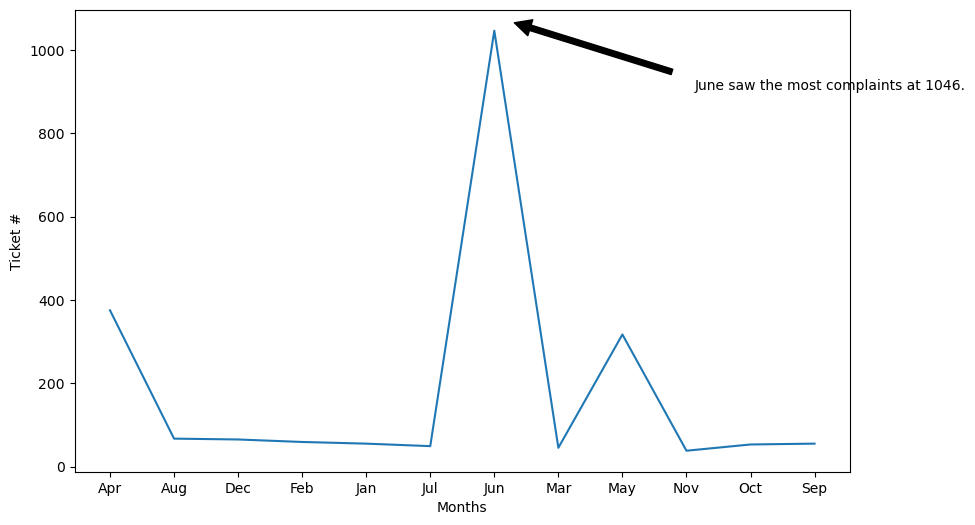

In [112]:
plt.figure(figsize = (10,6))
lp = sns.lineplot(x = 'Months', y= 'Ticket #', data = month)
ax = lp.axes
ax.annotate('June saw the most complaints at 1046.', color='black',
xy = (6, 1080), xycoords = 'data',
xytext = (0.8, 0.85), textcoords = 'axes fraction',
arrowprops = dict(facecolor = 'black', shrink=0.1),
horizontalalignment = 'left', verticalalignment='top')

In [113]:
complaints['Day in the month'] = pd.to_datetime(complaints['Date'])
daily_complaints_from_comcast_telecom_customers = complaints.set_index(complaints["Day in the month"])
daily_complaints_from_comcast_telecom_customers.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Months,Day,Day in the week,Day in the week,Day in the month
Day in the month,,,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,2,Wed,2015-04-22
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,1,Tue,2015-04-08
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,5,Sat,2015-04-18


<AxesSubplot:xlabel='Day in the month', ylabel='The quantity of complaints recieved'>

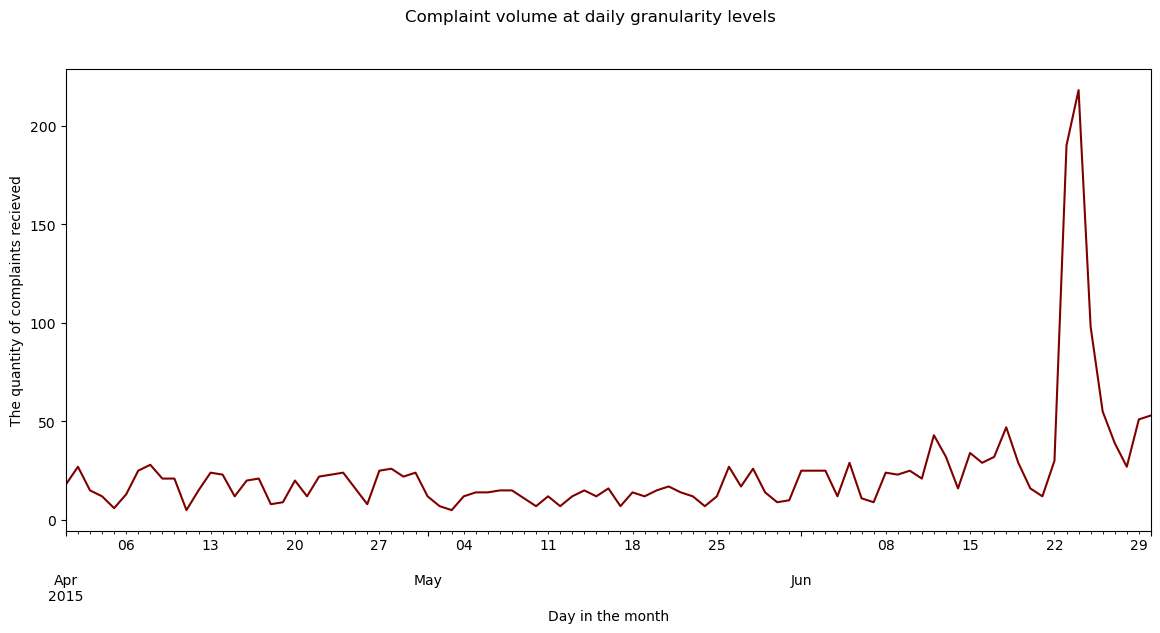

In [114]:
plt.figure(figsize=(14,6))
plt.suptitle('Complaint volume at daily granularity levels')
plt.ylabel('The quantity of complaints recieved')
daily_complaints_from_comcast_telecom_customers.groupby(pd.Grouper(freq="D")).size().plot(color='maroon')

<AxesSubplot:xlabel='Day in the week', ylabel='count'>

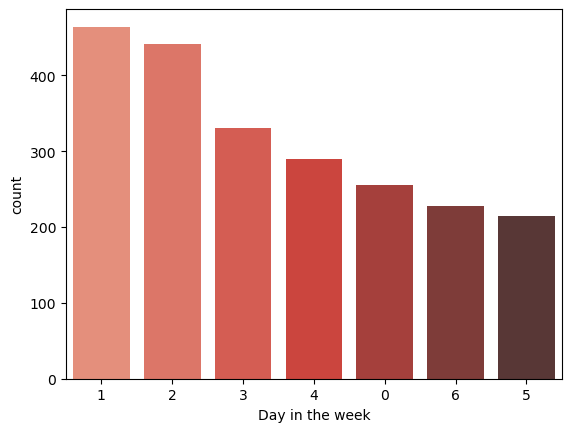

In [115]:
sns.countplot(x='Day in the week', data = complaints,order=complaints['Day in the week'].value_counts().index, palette ="Reds_d")

In [135]:
complaints['Customer Complaint'] = complaints['Customer Complaint'].str.title()
CT_freq = complaints['Customer Complaint'].value_counts(),
CT_freq

(Comcast                                                            102
 Comcast Data Cap                                                    30
 Comcast Internet                                                    29
 Comcast Data Caps                                                   21
 Comcast Billing                                                     18
                                                                   ... 
 Monthly Data Caps                                                    1
 Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
 Lost Emails/Billing                                                  1
 Improper Billing And Non Resolution Of Issues                        1
 Comcast, Ypsilanti Mi Internet Speed                                 1
 Name: Customer Complaint, Length: 1740, dtype: int64,)

In [137]:
complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Months,Day,Day in the week,Day in the week,Day in the month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,2,Wed,2015-04-22
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,1,Tue,2015-04-08
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,5,Sat,2015-04-18
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,5,6,Sun,2015-05-07
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,1,Tue,2015-05-26


In [138]:
complaints.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [140]:
complaints["New_Status"] = ["Open" if Status=="Open" or Status=="Pending" else"Closed"
for Status in complaints["Status"]]

In [141]:
complaints["New_Status"].unique()

array(['Closed', 'Open'], dtype=object)

In [146]:
state_of_complaints = pd.crosstab(complaints["State"],complaints["New_Status"])
state_of_complaints



New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


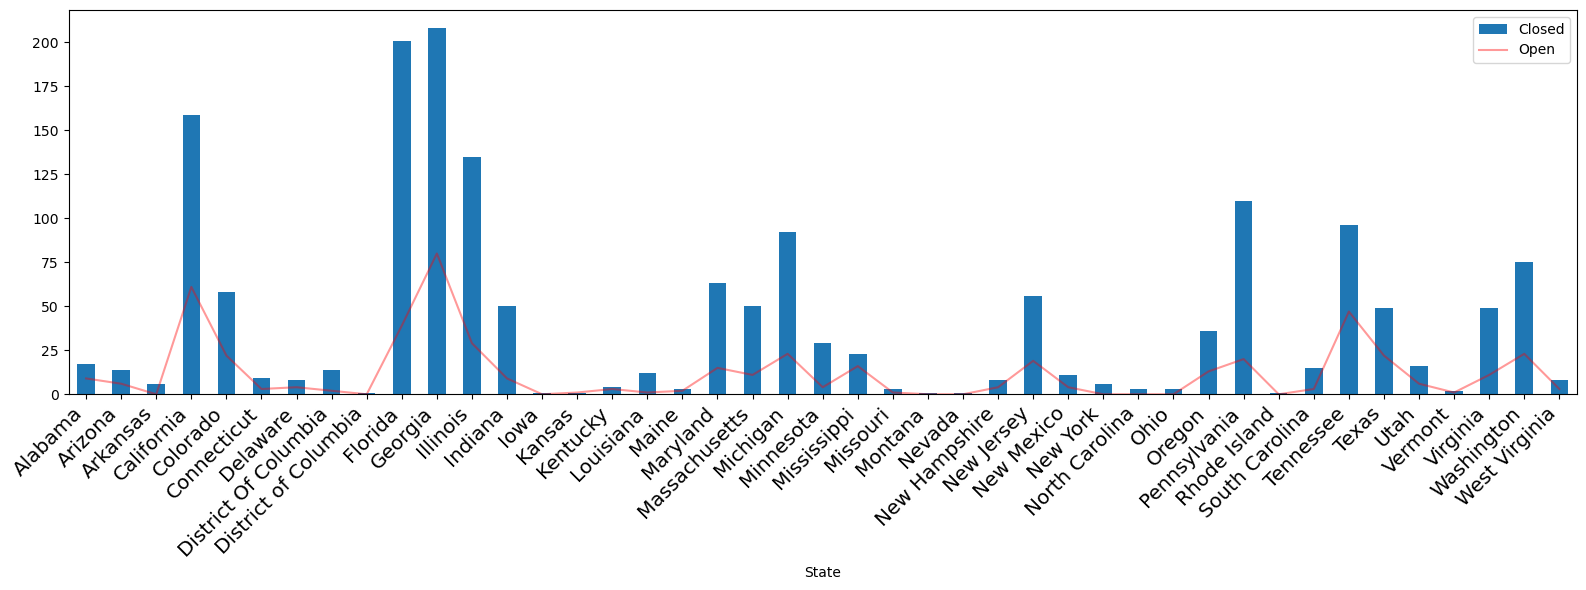

In [147]:
plt.figure(figsize=(16,6))
closed=state_of_complaints["Closed"]
opened=state_of_complaints["Open"]
opened.plot(ax=closed.plot(kind="bar",legend=True),color="r",alpha=0.4,legend="True")
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.tight_layout()

<AxesSubplot:title={'center':'State wise status of complaints'}, xlabel='State'>

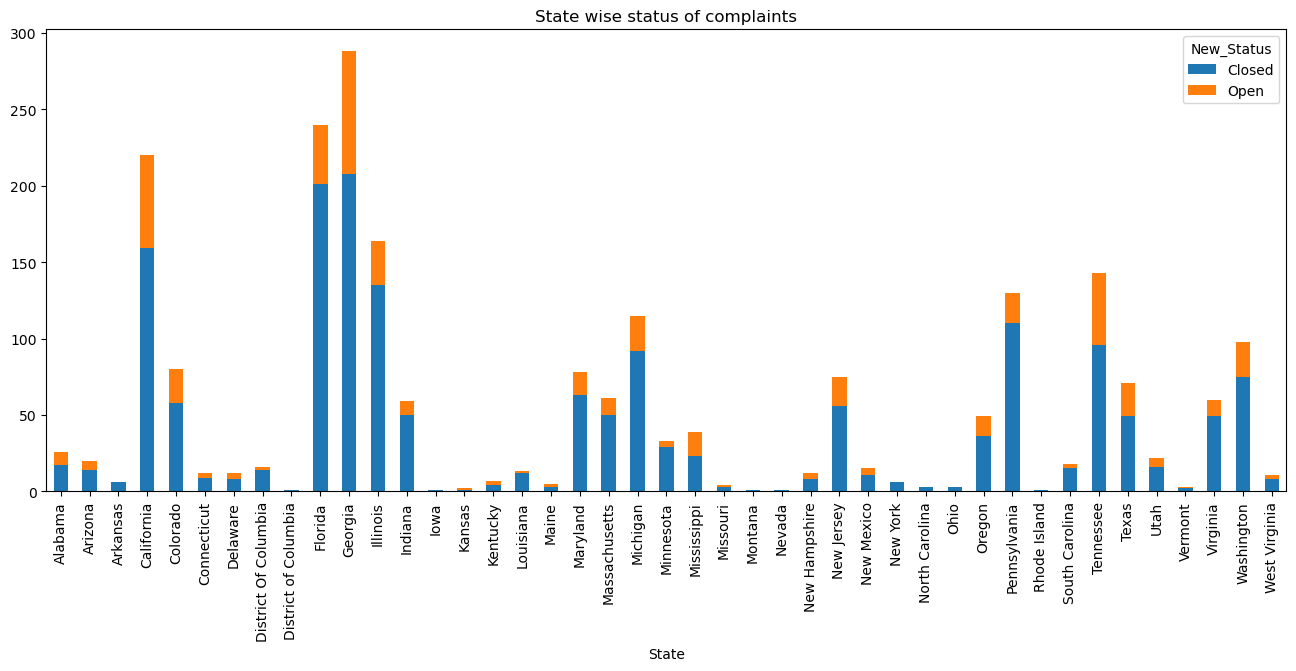

In [148]:
pd.crosstab(complaints["State"],complaints["New_Status"]).plot(kind='bar',
                                                               figsize=(16,6),stacked=True,
                                                               title='State wise status of complaints')

In [156]:
unsolved=state_of_complaints["Open"].sort_values()

In [158]:
print("State with max unresolved complaints: ",unsolved.idxmax(),unsolved.max())

State with max unresolved complaints:  Georgia 80


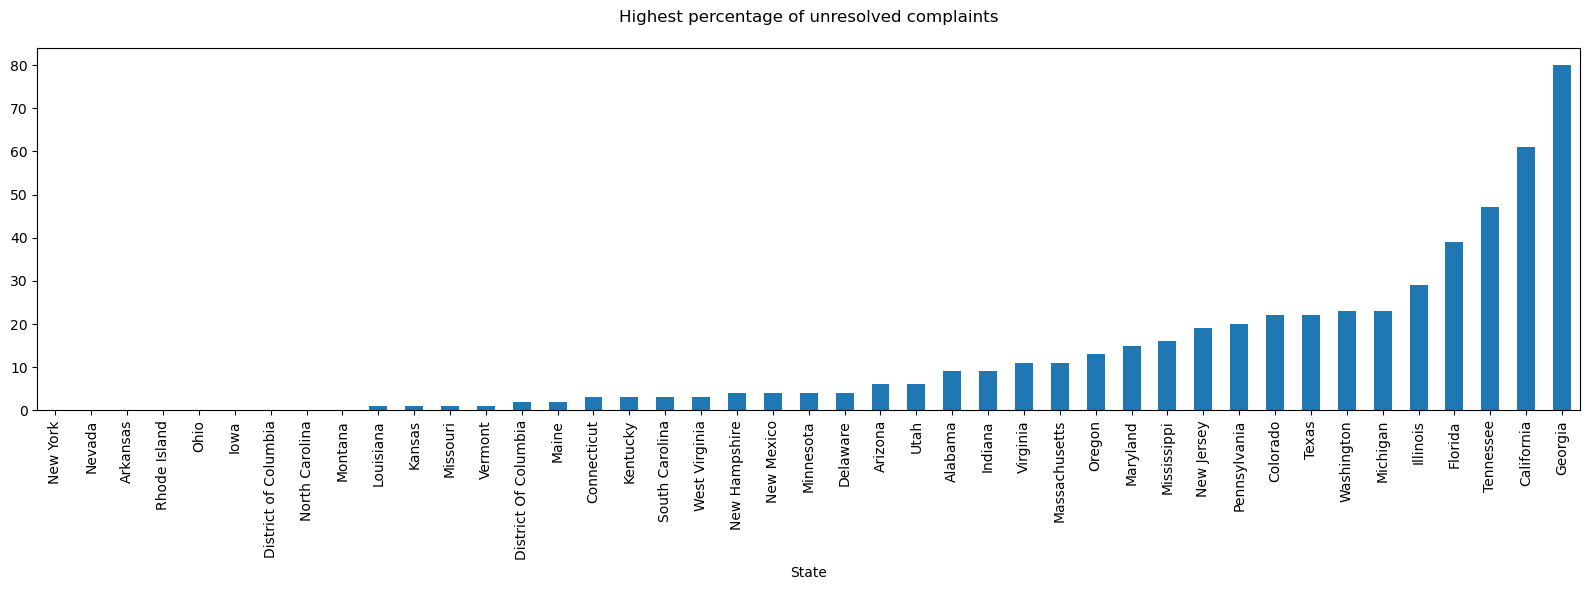

In [159]:
unsolved.plot(kind="bar", figsize=(16,6))
plt.title('Highest percentage of unresolved complaints\n')
plt.tight_layout()

In [160]:
complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Months,Day,Day in the week,Day in the week,Day in the month,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,2,Wed,2015-04-22,Closed
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,1,Tue,2015-04-08,Closed
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,5,Sat,2015-04-18,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,5,6,Sun,2015-05-07,Open
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,1,Tue,2015-05-26,Closed


In [161]:
complaints["Received Via"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [162]:
complaints.New_Status.value_counts()

Closed    1707
Open       517
Name: New_Status, dtype: int64

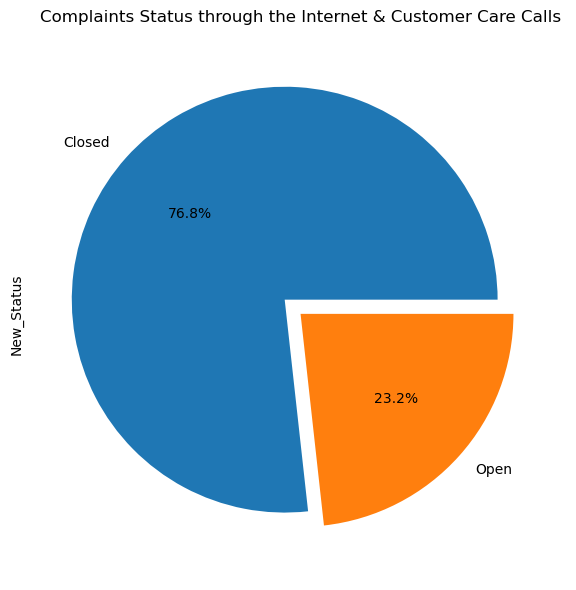

In [163]:
myexplode = [0.1,0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
complaints.New_Status.value_counts().plot(kind='pie',explode =myexplode,autopct='%1.1f%%',
figsize = (14,6))
plt.tight_layout()

In [172]:
import nltk

In [173]:
from wordcloud import WordCloud, STOPWORDS

In [184]:
common = complaints['Customer Complaint'].dropna().tolist()
common =''.join(common_complaints).lower()

stop_words = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One')

for word in stop_words:
        STOPWORDS.add(word)
        wordcloud = WordCloud(stopwords=STOPWORDS,
background_color='white',
width=1200,
height=1000).generate(common)

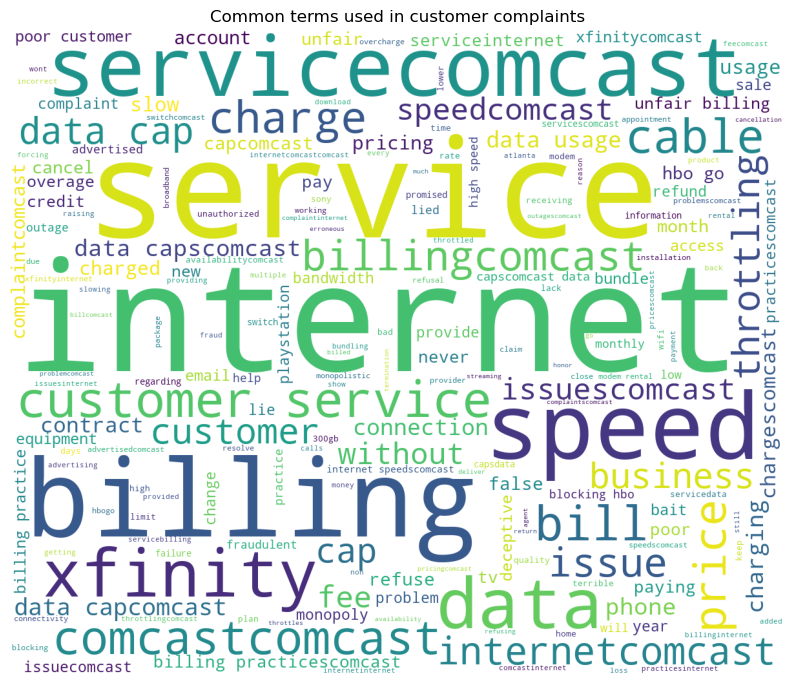

In [185]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Common terms used in customer complaints')
plt.axis('off')
plt.show()